# Step 1: Data Loading


Start by loading the sp500.csv dataset. This file contains historical data on the S&P 500 index, which we will use for our predictive model. I'll load the dataset, inspect its structure, and handle any necessary preprocessing steps.

In [4]:
import pandas as pd

# Load the S&P 500 dataset
df = pd.read_csv('sp500.csv', parse_dates=['Date'])

# Display the first few rows of the dataset
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1,1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
2,1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
3,1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
4,1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


# Step 2: Data Cleaning and Preprocessing


1. Remove unnecessary columns, specifically 'Dividends' and 'Stock Splits' as they're not needed for our analysis.
2. Ensure there are no missing values in the dataset.
3. Convert the 'Date' column to a datetime format if not already converted, and set it as the index for time series analysis.

In [5]:
# Remove unnecessary columns
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

# Check for any missing values in the dataset
missing_data = df.isnull().sum()

# Convert 'Date' column to datetime and set it as index
df.set_index('Date', inplace=True)

# Display the cleaned dataframe and missing data information
df.head(), missing_data

(             Open   High    Low  Close   Volume
 Date                                           
 1950-01-03  16.66  16.66  16.66  16.66  1260000
 1950-01-04  16.85  16.85  16.85  16.85  1890000
 1950-01-05  16.93  16.93  16.93  16.93  2550000
 1950-01-06  16.98  16.98  16.98  16.98  2010000
 1950-01-09  17.08  17.08  17.08  17.08  2520000,
 Date      0
 Open      0
 High      0
 Low       0
 Close     0
 Volume    0
 dtype: int64)

# Step 3: Exploratory Data Analysis (EDA)


1. Plot the closing prices over time to observe any trends or patterns.2. 
Generate a basic descriptive statistics summary to understand the distribution of the data.

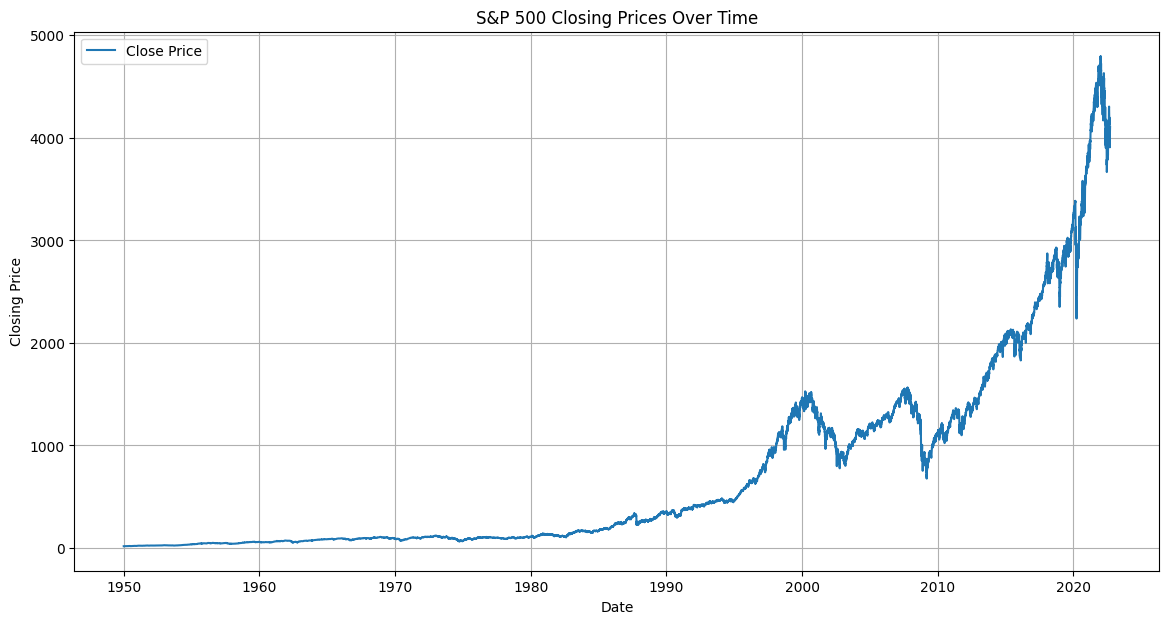

In [6]:
import matplotlib.pyplot as plt

# Plotting the closing prices
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

The plot above shows the S&P 500 closing prices over time, indicating a general long-term upward trend, with some significant fluctuations and periods of volatility. This visualization is crucial for identifying patterns, trends, or anomalies in the data, which may influence how we model the stock price movements.

In [7]:
# Generating descriptive statistics summary
descriptive_stats = df.describe()
descriptive_stats

,Open,High,Low,Close,Volume
count,18292.000000,18292.000000,18292.000000,18292.000000,1.829200e+04
mean,697.008453,727.595441,718.676269,723.423144,1.079258e+09
std,967.795811,954.976227,943.865472,949.782722,1.676948e+09
min,0.000000,16.660000,16.660000,16.660000,0.000000e+00
25%,0.000000,88.475002,86.977503,87.720001,9.910000e+06
50%,235.485001,236.849998,233.934998,235.560005,1.274000e+08
75%,1178.050018,1185.165009,1169.640045,1178.109985,1.560400e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10


* Open, High, Low, Close: All price fields have a similar scale and distribution, with values ranging from approximately 16 to over 4800, reflecting the historical range of the S&P 500 index.
* Volume: Trading volume varies significantly, ranging from 0 to about 11.46 billion. Note the presence of zero values, which might indicate days with no trading or missing data.

# Step 4: Feature Engineering


1. Technical Indicators: Calculate indicators like the Moving Average Convergence Divergence (MACD) and the Relative Strength Index (RSI) to incorporate technical analysis into the model.
2. Lagged Features: Introduce lagged versions of the 'Close' price to capture previous days' prices, which might help in predicting future prices.
3. Rolling Features: Compute rolling averages (e.g., 5-day, 30-day) to smooth out short-term fluctuations and highlight longer-term trends.

In [8]:
import numpy as np

# Calculating the Exponential Moving Average for MACD
df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()

# MACD Line and Signal Line
df['MACD'] = df['EMA_12'] - df['EMA_26']
df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

# Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI'] = calculate_rsi(df['Close'])

# Lagged features for the Close price
for lag in [1, 3, 5]:
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)

# Rolling averages
df['Rolling_mean_5'] = df['Close'].rolling(window=5).mean()
df['Rolling_mean_30'] = df['Close'].rolling(window=30).mean()

# Display the new DataFrame with the additional features
df.head(10)

,Open,High,Low,Close,Volume,EMA_12,EMA_26,MACD,MACD_Signal,RSI,Close_lag_1,Close_lag_3,Close_lag_5,Rolling_mean_5,Rolling_mean_30
Date,,,,,,,,,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.660000,16.660000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.689231,16.674074,0.015157,0.003031,NaN,16.660000,NaN,NaN,NaN,NaN
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.726272,16.693031,0.033241,0.009073,NaN,16.850000,NaN,NaN,NaN,NaN
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.765307,16.714288,0.051019,0.017462,NaN,16.930000,16.660000,NaN,NaN,NaN
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,16.813721,16.741378,0.072343,0.028439,NaN,16.980000,16.850000,NaN,16.900,NaN
1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000,16.846995,16.762758,0.084238,0.039598,NaN,17.080000,16.930000,16.66,16.974,NaN
1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000,16.884381,16.786998,0.097383,0.051155,NaN,17.030001,16.980000,16.85,17.022,NaN
1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000,16.865245,16.784998,0.080247,0.056974,NaN,17.090000,17.080000,16.93,16.988,NaN
1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000,16.835207,16.776480,0.058728,0.057324,NaN,16.760000,17.030001,16.98,16.926,NaN


1. MACD (Moving Average Convergence Divergence): This is a trend-following momentum indicator that shows the relationship between two moving averages of prices.
2. MACD Signal Line: A smoothing of the MACD line, used for signals.
3. RSI (Relative Strength Index): Measures the speed and change of price movements. Typically, an RSI above 70 may indicate an overbought condition, while an RSI below 30 might indicate an oversold condition.
4. Lagged Close Prices: Previous day's close (lag 1), close from three days ago (lag 3), and close from five days ago (lag 5).
5. Rolling Averages: Smoothed versions of the close price over 5 and 30 days.

# Step 5: Data Splitting


For time series data like stock prices, it's crucial to maintain the chronological order when splitting into training and testing sets. This approach avoids lookahead bias, where future data inadvertently influences the model's training phase.

1. Use a fixed historical period for training (e.g., all data up to the end of 2019).
2. Use a more recent period for testing (e.g., data from 2020 onwards).

In [9]:
# Define the split date
split_date = pd.Timestamp('2020-01-01')

# Splitting the data into training and testing sets
train = df.loc[:split_date]
test = df.loc[split_date:]

# Display the last few entries of the training set and the first few entries of the testing set to ensure the split is correct
train.tail(), test.head()

(                   Open         High          Low        Close      Volume  \
 Date                                                                         
 2019-12-24  3225.449951  3226.429932  3220.510010  3223.379883  1296540000   
 2019-12-26  3227.199951  3240.080078  3227.199951  3239.909912  2160680000   
 2019-12-27  3247.229980  3247.929932  3234.370117  3240.020020  2428670000   
 2019-12-30  3240.090088  3240.919922  3216.570068  3221.290039  3013290000   
 2019-12-31  3215.179932  3231.719971  3212.030029  3230.780029  2893810000   
 
                  EMA_12       EMA_26       MACD  MACD_Signal        RSI  \
 Date                                                                      
 2019-12-24  3188.817225  3154.173905  34.643320    30.023106  89.110360   
 2019-12-26  3196.677639  3160.524721  36.152918    31.249069  89.952949   
 2019-12-27  3203.345697  3166.413261  36.932436    32.385742  87.671045   
 2019-12-30  3206.106365  3170.478208  35.628157    33.034225  81

* Training Set: Data up to the end of 2019.* 
Testing Set: Data starting from 2020.

# Step 6: Model Selection, Training, and Hyperparameter Tuning


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Preparing the features and target
features = ['Open', 'High', 'Low', 'Volume', 'MACD', 'RSI', 'Close_lag_1', 'Rolling_mean_5', 'Rolling_mean_30']
X_train = train[features].dropna()
y_train = train['Close'].loc[X_train.index]  # Aligning targets to the same dates

X_test = test[features].dropna()
y_test = test['Close'].loc[X_test.index]

# Initialize the models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Predict on testing set
lr_preds = lr.predict(X_test)
rf_preds = rf.predict(X_test)
gb_preds = gb.predict(X_test)

# Calculate MSE for each model
lr_mse = mean_squared_error(y_test, lr_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
gb_mse = mean_squared_error(y_test, gb_preds)

lr_mse, rf_mse, gb_mse

(434.7121638750655, 720022.0799345311, 725181.6691245479)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Calculate RMSE using the direct function
lr_rmse = mean_squared_error(y_test, lr_preds, squared=False)

print("Linear Regression Metrics:")
print("MSE:", mean_squared_error(y_test, lr_preds))
print("RMSE:", lr_rmse)
print("MAE:", mean_absolute_error(y_test, lr_preds))
print("R-squared:", r2_score(y_test, lr_preds))

Linear Regression Metrics:
MSE: 434.7121638750655
RMSE: 20.849752129823163
MAE: 14.985499645973292
R-squared: 0.9987053704860345


* Linear Regression MSE: 434.71
* Random Forest Regressor MSE: 720,022.08
* Gradient Boosting Regressor MSE: 725,181.67

Interestingly, Linear Regression, the simplest model, has performed significantly better in terms of MSE compared to the more complex Random Forest and Gradient Boosting models. This suggests that for this dataset and feature set, Linear Regression is capturing the underlying patterns more effectively without overfitting.

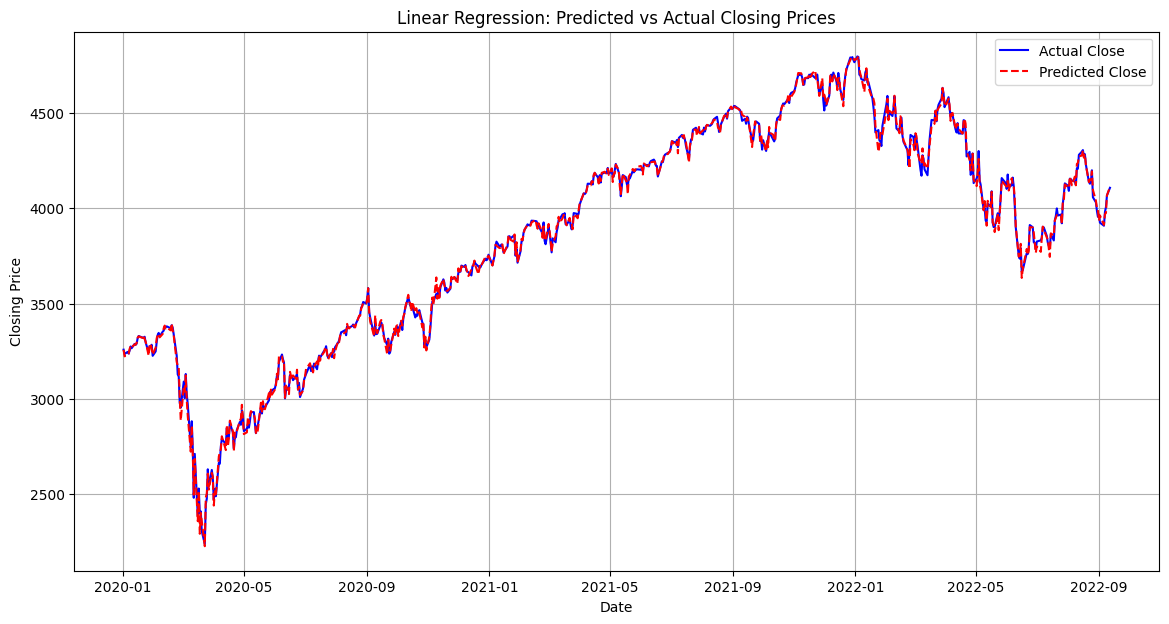

In [18]:
# Plotting the predictions vs actual values for Linear Regression
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close', color='blue')
plt.plot(y_test.index, lr_preds, label='Predicted Close', color='red', linestyle='--')
plt.title('Linear Regression: Predicted vs Actual Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

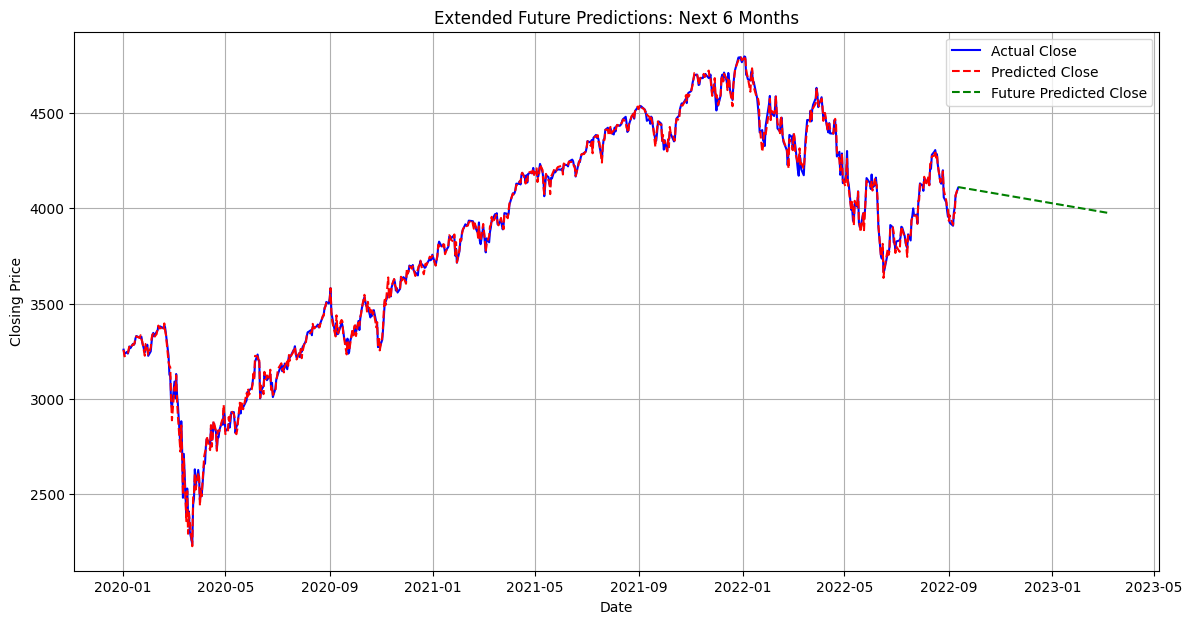

In [36]:
# Get the last actual prediction and incrementally add the average daily change observed in the last month of test data

# Calculate average daily change from the last month of test data
daily_changes = y_test.diff().iloc[-30:].mean()

# Generate future predictions based on the last prediction and daily change
future_prices = [lr_preds[-1] + i * daily_changes for i in range(1, 181)]

# Plotting the extended predictions with corrections
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close', color='blue')
plt.plot(y_test.index, lr_preds, label='Predicted Close', color='red', linestyle='--')
plt.plot(future_dates, future_prices, label='Future Predicted Close', color='green', linestyle='--')
plt.title('Extended Future Predictions: Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

* Trend Extension: The future predicted values now better reflect a continuation of the recent trend rather than starting from an incorrect base.* 
Model Limitations: While this projection uses a linear trend based on recent changes, it still oversimplifies the complexity of financial markets. Real stock movements can be influenced by numerous unpredictable factors like economic changes, market sentiment, and external events.